In [1]:
import os
import cyclehunter
from cyclehunter import *
import numpy as np
from scipy.optimize import minimize
from scipy.linalg import eig
import matplotlib.pyplot as plt
import time

# PhiK Class

Class instantiation expects $n$, $k$, and $\mu^2$.

k is now reflective of the actual k in the equation name; previously it was the exponent in the E-L equations
Phi-4 is now $k=4$ as it should be

In [2]:
n = 3
k = 4
musqr = 5

Descriptions/the documentation can be read for any function by typing '?' after the function/method/class

In [3]:
PhiK?

Relevant attributes are `n`, `k`, `musqr`, `states`, `basis`

In [4]:
x = PhiK(n, k, musqr)

The `states` are empty until we populate them via `generate_states`; Here is how you can populate the instance with all possible cycles

In [5]:
x.generate_states?

In [6]:
x = x.generate_states()

In [7]:
print(type(x.states), x.states.shape)

<class 'numpy.ndarray'> (27, 3)


Prime cycles are default, but can be set to False and then reproduced by calling `prime_cycles` function. This functionality gives a higher degree of control over the types of symmetries that the cycles have. 

In [8]:
x = x.prime_cycles()

In [9]:
print(f'There are {x.states.shape[0]} states after quotienting repeats and cyclic permutations')
x.states

There are 8 states after quotienting repeats and cyclic permutations


array([[-1, -1,  0],
       [-1, -1,  1],
       [ 0, -1,  0],
       [ 0, -1,  1],
       [ 1, -1,  0],
       [ 1, -1,  1],
       [ 0,  0,  1],
       [ 1,  0,  1]])

The numerical optimization routine is built into the class as opposed to be a separate module like it is in `orbithunter`;
this package's sister package.

In [10]:
x_converged = x.hunt()

Before after comparison

In [11]:
x.states 

array([[-1, -1,  0],
       [-1, -1,  1],
       [ 0, -1,  0],
       [ 0, -1,  1],
       [ 1, -1,  0],
       [ 1, -1,  1],
       [ 0,  0,  1],
       [ 1,  0,  1]])

In [12]:
x_converged.states 

array([[-1.06677926, -1.06677926, -0.33060463],
       [-1.19266331, -1.19266331,  1.32651313],
       [-0.19883715, -1.1537165 , -0.19883715],
       [ 0.        , -1.26491094,  1.26491094],
       [ 1.26491094, -1.26491094,  0.        ],
       [ 1.19266331, -1.32651313,  1.19266331],
       [ 0.19883715,  0.19883715,  1.1537165 ],
       [ 1.06677926,  0.33060463,  1.06677926]])

Technically, I should be returning the optimization result to ensure convergence, however the two functions for the
equations of motion/cost function and the gradient of the cost function are: `eqn`, `cost`, `costgrad`.

Cost is the $L_2$ norm squared of the governing equations `1/2 F^2`

In [13]:
print(f'The original cost function value for all cycles was {x.cost()}')
print(f'After running the optimization routine via the hunt function, it is {x_converged.cost()}')

The original cost function value for all cycles was 53.99999999999999
After running the optimization routine via the hunt function, it is 1.1815044184388797e-10


Cost functional `1/2 F^2` is a scalar valued function; therefore the gradient is a vector, not a matrix.

In [14]:
x_converged.costgrad()

array([ 1.08567307e-05,  1.08567307e-05,  5.02395572e-06, -3.23339051e-05,
       -3.23339051e-05, -1.97369425e-04,  1.19628119e-06,  2.12130064e-05,
        1.19628119e-06,  0.00000000e+00,  3.26107890e-05, -3.26107890e-05,
       -3.26107890e-05,  3.26107890e-05,  0.00000000e+00,  3.23339051e-05,
        1.97369425e-04,  3.23339051e-05, -1.19628119e-06, -1.19628119e-06,
       -2.12130064e-05, -1.08567307e-05, -5.02395572e-06, -1.08567307e-05])

Because it is the squared loss, we can expect the residual of each individual site to be on the order of the square root of the residual. 

In [15]:
x_converged.eqn()

array([[-1.03063594e-06, -1.03063594e-06,  5.52687077e-07],
       [ 1.45450969e-06,  1.45450969e-06,  1.00265457e-05],
       [-7.90793613e-08, -1.62385988e-06, -7.90793613e-08],
       [ 0.00000000e+00, -2.03817493e-06,  2.03817493e-06],
       [ 2.03817493e-06, -2.03817493e-06,  0.00000000e+00],
       [-1.45450969e-06, -1.00265457e-05, -1.45450969e-06],
       [ 7.90793613e-08,  7.90793613e-08,  1.62385988e-06],
       [ 1.03063594e-06, -5.52687077e-07,  1.03063594e-06]])

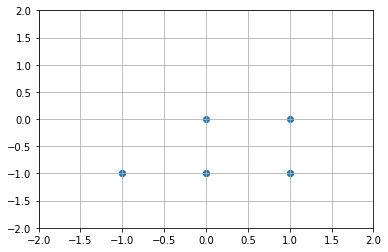

In [16]:
fig, ax = plt.subplots()
ax.scatter(x.states[:, 0], x.states[:, 1])
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.grid()

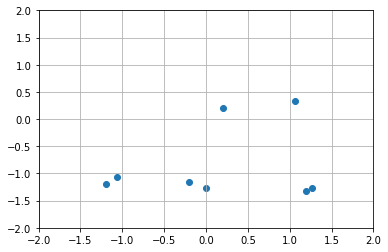

In [17]:
fig, ax = plt.subplots()
ax.scatter(x_converged.states[:, 0], x_converged.states[:, 1])
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.grid()